### **Refracción Sísmica**
#### Taller 1 || 2023-2
##### Ana María Valencia Londoño
##### Kevin Villegas Tamayo


**1.** Elabore un diagrama t vs x con los datos de las recolecciones del registro que se muestra en la
figura. Suponga el registro de capas horizontales. Determine el número de capas presentes, y las
velocidades y el espesor de cada una (hasta donde sea posible).

**Fórmulas empleadas**: 
**Velocidad**: *1/m
**Espesor** *t0  =  * 2h1Cos(ic)v1 
**Ley de Snell**= *sen(v1/v2)

Definimos los tiempos de llegada y la distancia de los geófonos desde la fuente de energía. Quedan consignados en las siguientes líneas de código:

In [164]:
tiempos = [14, 21, 28, 37, 43, 52, 59, 66, 68, 71, 73, 76, 79] #Dados en ms
distancias = [5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41] #Dadas en m

In [165]:
import matplotlib.pyplot as plt

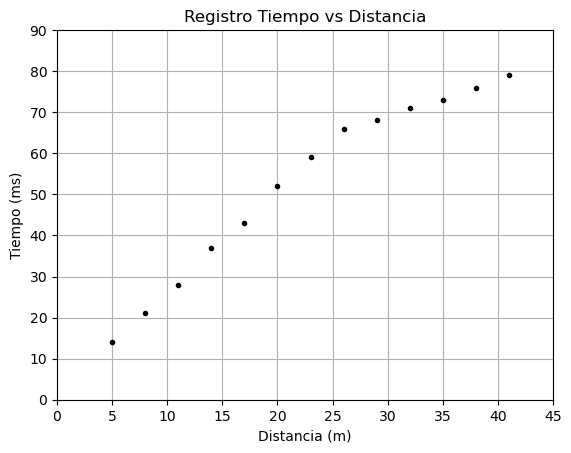

In [166]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(distancias, tiempos, marker='.', linestyle = ' ', color='black')

ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Tiempo (ms)')

ax.set_title('Registro Tiempo vs Distancia')
ax.set_xlim((0, 45))
ax.set_ylim((0, 90))
ax.grid(True)

plt.show()

Inicialmente se observa en la gráfica dos cambios en la pendiente que permite diferenciar lo que está sucediendo en el ensayo, el cambio de pendiente indica que la onda directa se ha propagado hasta una superficie 1, la cual llamaremos frontera y luego de que llega la señal hasta la frontera incia un viaje hacia la superficie, conociéndose ese fenómeno como refracción. Por lo tanto, se concluye que en los datos recolectados por los geófonos hay **una única frontera.**

Al continuar con el análisis de las gráficas podemos observar una alta linealidad entre los datos, es decir poseen una tasa de cambio muy similar respecto a sus variables, de igual manera se corrobora lo observado correlacionando los datos de manera estadística, como se muestra a continuación:

In [167]:
import numpy as np

In [168]:
coeficientes = np.corrcoef(distancias, tiempos)
print(coeficientes)

[[1.         0.97682482]
 [0.97682482 1.        ]]


Los elementos fuera de la diagonal principal de la matriz son muy cercanos a 1. Esto nos indica que la dispersión entre los datos es muy baja , por ende hay una linealidad que permite ver el cambio de pendiente sencilla.


Procedemos a realizar una **regresión lineal por mínimos cuadrados** para obtener las rectas que nos representaran la serie de puntos, para así encontrar los parámetros que se necesitan.

Se organizan los datos extraídos de la gráfica "Tiempo vs. Distancia", que incluyen la información de la onda directa (od) y de la onda críticamente refractada (oc).

In [169]:
oddist = [5, 8, 11, 14, 17, 20, 23, 26]
odtiempo = [14, 21, 28, 37, 43, 52, 59, 66]
ocdist = [26, 29, 32, 35, 38, 41]
octiempo = [66, 68, 71, 73, 76, 79]

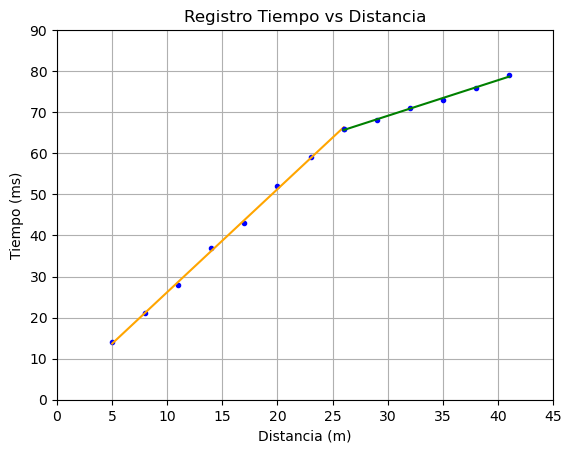

In [223]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.plot(oddist, odtiempo, marker='.', linestyle = ' ', color='blue')

#Hagamos regresión a la od
odd1 = np.array([5, 8, 11, 14, 17, 20, 23, 26]) #distancia onda directa
odt1 = np.array([14, 21, 28, 37, 43, 52, 59, 66]) #tiempo onda directa

mean_odd1 = np.mean(odd1)
mean_odt1 = np.mean(odt1)
n = len(odd1)
numer = np.sum((odd1 - mean_odd1) * (odt1 - mean_odt1))
denom = np.sum((odd1 - mean_odd1) ** 2)
m = numer / denom
b = mean_odt1 - (m * mean_odd1)

# Calcular los valores ajustados de y (y_pred)
y_pred = m * odd1 + b


# Imprimir la pendiente y la intersección
#print("Pendiente od (m):", m)
#print("Intersección od (b):", b)


plt.plot(odd1, y_pred, color="orange", label="Recta de Regresión")

#Ahora regresión a la cr

ax.plot(ocdist, octiempo, marker='.', linestyle = ' ', color='blue')

ocdist = np.array([26, 29, 32, 35, 38, 41]) #distancia onda criticamente refractada
octiempo = np.array([66, 68, 71, 73, 76, 79]) #tiempo onda criticamente refractada

mean_ocdist = np.mean(ocdist)
mean_octiempo = np.mean(octiempo)
n2 = len(ocdist)
numer2 = np.sum((ocdist - mean_ocdist) * (octiempo - mean_octiempo))
denom2 = np.sum((ocdist - mean_ocdist) ** 2)
m2 = numer2 / denom2
b2 = mean_octiempo - (m2 * mean_ocdist)

# Calcular los valores ajustados de y (y_pred)
y_pred = m2 * ocdist + b2


# Imprimir la pendiente y la intersección
#print("Pendiente oc (ms/m):", m2)
#print("Intersección oc (ms):", b2)


plt.plot(ocdist, y_pred, color="green", label="Recta de Regresión")


ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Tiempo (ms)')

ax.set_title('Registro Tiempo vs Distancia')
ax.set_xlim((0, 45))
ax.set_ylim((0, 90))
ax.grid(True)

plt.show()

Al observar los datos ploteados luego de la regresión binomial, se puede decir que en el eje de distancia en el rango [24, 26] se encuentra la distancia crítica, que es el valor mínimo en donde existe la onda reflejada, adicional se continúa hallando la pendiente que nos permitirá encontrar las velocidades y adicional los interceptos de las rectas.

In [171]:
# Imprimir la pendiente y la intersección
print("Pendiente Onda Directa (ms/m):", m)
print("Intersección Onda Directa (ms):", b)
print()
# Imprimir la pendiente y la intersección
print("Pendiente Onda Críticamente Refractada (ms/m):", m2)
print("Intersección Onda Críticamente Refractada (ms):", b2)
print()

Pendiente Onda Directa (ms/m): 2.507936507936508
Intersección Onda Directa (ms): 1.1269841269841265

Pendiente Onda Críticamente Refractada (ms/m): 0.8666666666666667
Intersección Onda Críticamente Refractada (ms): 43.13333333333334



Para determinar las velocidades y los espesores a partir de estos datos, es importante recordar que la **velocidad** es el inverso de la pendinte de las rectas encontradas.

In [172]:
#Velocidad Onda Directa:
velocidad = round((1/m), 3)

#Velocidad Onda Críticamente Refractada
velocidad2 = round(1/m2, 3)

print("La velocidad de la Onda Directa es ", velocidad, "m/ms")
print()
print("La velocidad de la Onda Críticamente Refractada es", velocidad2, "m/ms")
print()

La velocidad de la Onda Directa es  0.399 m/ms

La velocidad de la Onda Críticamente Refractada es 1.154 m/ms



Para calcular el espesor de la capa, primero debemos encontrar el ángulo de incidencia crítico, debido a que este nos permite diferenciar y calcular el espesor de las capas en el subsuelo. Conociendo la distancia entre la fuente y el receptor, junto con el ángulo de incidencia real de la onda refractada, se puede determinar la profundidad a la interfaz entre capas aplicando relaciones geométricas. Esta profundidad corresponde directamente al espesor de la capa superior. Cuanto mayor sea el ángulo de incidencia, la onda proviente de una interfaz más profunda, indicando capas superiores más gruesas. Comparar el ángulo real con el crítico permite confirmar si la onda detectada representa la primera refractada en esa interfaz. De esta manera, el ángulo de incidencia es indispensable para estimar correctamente el espesor de las unidades refractantes en la sísmica de refracción.

In [173]:
angcrit = np.arcsin(velocidad/velocidad2)
print("El ángulo de incidencia crítico es ", round(np.degrees(angcrit), 3), "°", sep='')
#print(angcrit)

El ángulo de incidencia crítico es 20.228°


Ahora podemos hallar fácilmente el espesor del estrato:

In [174]:
h1 = (b2*velocidad)/(2*(np.cos(angcrit)))
print("El espesor del estrato es", round(h1, 3), "m")

El espesor del estrato es 9.171 m


Es esencial resaltar que en un rango de ángulos de 15° a 25°, se manifiesta un contraste notable en las velocidades de las ondas directa y refractada.
Dado que nuestro ángulo de incidencia es de 20°, podemos inferir que los datos exhiben una coherencia significativa, la cual se respalda con las
velocidades calculadas. Además, al analizar la gráfica que incluye la regresión, podemos apreciar de manera efectiva la concordancia con lo mencionado. 

**2.** Asuma que la siguiente gráfica corresponde a las regresiones de un registro de una frontera
inclinada. ¿Hacia dónde está inclinada la frontera? Estime las velocidades de los medios por encima
y por debajo de la frontera (V 1 y V 2 ), así como su ángulo de buzamiento, y los espesores de la primera
capa en los sitios de disparo (h 1 y h 1 ’)

**Velocidad**: *1/m
**Espesor** *t0  =  *2h1Cos(ic)v1 
**Ley de Snell**= *sen(v1/v2)


El ejercicio nos indica que la gráfica corresponde a un registro de una frontera inclinada, y por lo tanto esta es asimétrica. Para saber hacia donde está inclinada la frontera, basta con saber cuál registro de ondas críticamente refractadas llega primero, el que tuvo la fuente de energía a la izquierda o el que la tuvo a la derecha.
Las ondas críticamente refractadas son las representadas por el color rojo. El registro que tuvo la fuente de energía a la izquierda muestra un tiempo de llegada de 20 ms, casi la mitad del otro, indicando que la frontera está más cerca a ese lado.
**Podemos concluir entonces que la frontera está inclinada hacia la derecha**

Para estimar las velocidades por encima y por debajo de la frontera, basta con hallar las pendintes de las rectas correspondientes, el ángulo de buzamiento de la capa y el ángulo de incidencia crítico:

In [175]:
#Onda directa
m3 = (20-0)/(30-0)

#Onda críticamente refractada - Caso Down-Dip
m4 = (50-20)/(150-30)
    
#Onda críticamente refractada - Caso Up-Dip
m5 = (50-40)/(90-0)
              
print("La pendiente correspondiente a la Onda directa es", round(m3, 3))
print("La pendiente correspondiente a la Onda críticamente refractada, Caso Down-Dip es", round(m4, 3))
print("La pendiente correspondiente a la Onda críticamente refractada, Caso Up-Dip es", round(m5, 3))

La pendiente correspondiente a la Onda directa es 0.667
La pendiente correspondiente a la Onda críticamente refractada, Caso Down-Dip es 0.25
La pendiente correspondiente a la Onda críticamente refractada, Caso Up-Dip es 0.111


In [176]:
#V1
v1 = 1/m3
print('La velocidad del medio por encima de la frontera (V1) es', round(v1, 3), "m/ms")

La velocidad del medio por encima de la frontera (V1) es 1.5 m/ms


In [177]:
#Ángulo de buzamiento de la capa
angbuz = 0.5*(np.arcsin(v1*m4)-np.arcsin(v1*m5))
print("El ángulo de buzamiento de la capa es ", round(np.degrees(angbuz), 3), '°', sep='')

El ángulo de buzamiento de la capa es 6.215°


Ahora calculamos el ángulo de incidencia crítico:

In [178]:
angcrit2 = np.arcsin(v1*m4)-angbuz
print("El ángulo de incidencia crítico es ", round(np.degrees(angcrit2),3), '°', sep='')

El ángulo de incidencia crítico es 15.809°


Tenemos todos los datos para estimar así la velocidad de la capa 2

In [179]:
v2 = v1/(np.sin(angcrit2 + angbuz))
print("La velocidad del medio por debajo de la frontera (V2) es", round(v2, 3), "m/ms")

La velocidad del medio por debajo de la frontera (V2) es 4.0 m/ms


Por último, calculemos los espesores de las capas en los sitios de disparo.

In [180]:
#Definimos los interceptos de las ondas críticamente refractadas
intercepto1 = 12
intercepto2 = 28
#Espesor a la izquierda
h1 = (intercepto1*v1)/(2*np.cos(angcrit))
print("El espesor de la capa en el costado izquierdo es", round(h1, 3), "m")
h2 = (intercepto2*v1)/(2*np.cos(angcrit))
print("El espesor de la capa en el costado derecho es", round(h2, 3), "m")

El espesor de la capa en el costado izquierdo es 9.592 m
El espesor de la capa en el costado derecho es 22.38 m


**3.** Para la siguiente configuración del subsuelo elabore el gráfico de dromocrónicas (gráficos t vs x en
ambos sentidos) con disparos desde ambos extremos de la línea: Se tienen 3 medios formando una
estructura de capas paralelas, con velocidad constante, y contactos buzando 10.5° en la dirección
del experimento. La longitud total del arreglo es de 200m. V 1 = 800 m/s, V 2 = 1300 m/s, V 3 = 1800
m/s, h 1 = 8 m, h 2 = 11 m. ¿Hay capas ocultas en el registro? (Explique)

Para crear el gráfico primero se deben construir primero construir las fórmulas de las ondas:
Se deben considerar las siguientes fórmulas:

**Onda directa:** *X/V1

**Ley de Snell**: *sen(V1/V2) *Es importante considerar que no puede ser mayor a 90°

**Primera refracción**: *t=xsen(Ic+teta)/v1 + 2h1*cos(Ic11)/v1

**Segunda refracción**: *xsen(Ic21+teta)/v1+2h1xcos(Ic21)/v1+2h2(Ic22)/v2

Primero debemos calcular los ángulos críticos que luego serán utilizados en las ecuaciones generales. Esto se ve a continuación:

In [181]:
senic11 = 800/1300
senic12 = 800/1800
senic22 = 1300/1800
ic11 = np.arcsin(800/1300)
ic12 = np.arcsin(800/1800)
ic22 = np.arcsin(1300/1800)

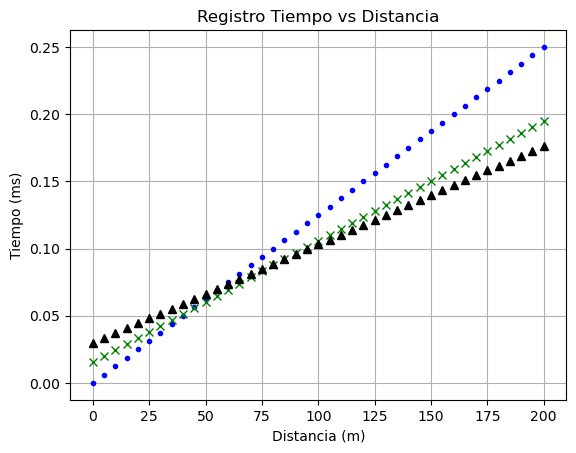

In [182]:
t_1 = []
t_2 = []
t_3 = []
dist = []
for i in range(0, 201, 5):
    t1 = i/800
    t_1.append(t1)
    t2 = ((i*np.sin(senic11+np.radians(10.5)))/800)+((2*8*np.cos(ic11))/800)
    t_2.append(t2)
    t3 = ((i*np.sin(senic12+np.radians(10.5)))/800)+((2*8*np.cos(ic12))/800)+((2*11*np.cos(ic22))/1300)
    t_3.append(t3)
    dist.append(i)
#print(t_1)
#print(t_2)
#print(t_3)

fig3 = plt.figure()
ax = fig3.add_subplot(111)
ax.plot(dist, t_1, marker='.', linestyle = ' ', color='blue')
ax.plot(dist, t_2, marker='x', linestyle = ' ', color='green')
ax.plot(dist, t_3, marker='^', linestyle = ' ', color='black')

ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Tiempo (ms)')

ax.set_title('Registro Tiempo vs Distancia')
#ax.set_xlim((0, 45))
#ax.set_ylim((0, 90))
ax.grid(True)

plt.show()
#print(len(t_3))

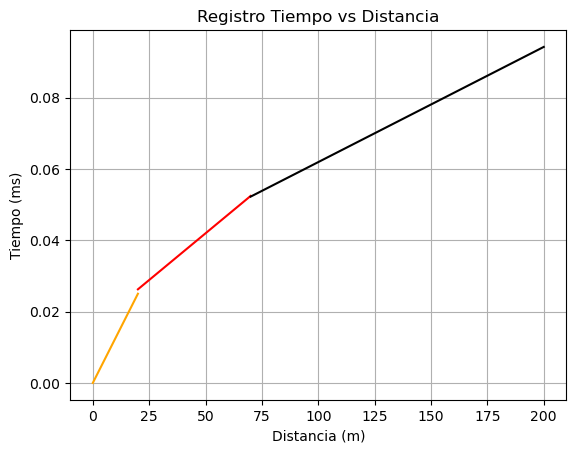

In [218]:
t_11 = []
d_11 = []
for j in range(5):
    t_11.append(t_1[j])
    d_11.append(dist[j])
#print(t_11)

t_22 = []
d_22 = []
for j in range(4, 15):
    t_22.append(t_2[j])
    d_22.append(dist[j])
#print(t_22)

t_33 = []
d_33 = []
for j in range(14, 41):
    t_33.append(t_3[j])
    d_33.append(dist[j])
#print(t_33)

fig4 = plt.figure()
ax = fig4.add_subplot(111)
#ax.plot(dist, t_1, marker='.', linestyle = ' ', color='blue')
#ax.plot(dist, t_2, marker='x', linestyle = ' ', color='green')
#ax.plot(dist, t_3, marker='^', linestyle = ' ', color='black')


#Hagamos regresión a la od
odd = np.array(d_11) #distancia onda directa
odt = np.array(t_11) #tiempo onda directa

mean_odd = np.mean(odd)
mean_odt = np.mean(odt)
n = len(odd)
numer = np.sum((odd - mean_odd) * (odt - mean_odt))
denom = np.sum((odd - mean_odd) ** 2)
m = numer / denom
b = mean_odt - (m * mean_odd)

# Calcular los valores ajustados de y (y_pred)
y_pred1 = m * odd + b


# Imprimir la pendiente y la intersección
#print("Pendiente od (m):", m)
#print("Intersección od (b):", b)

plt.plot(odd, y_pred1, color="orange", label="Recta de Regresión Onda Directa")

#Hagamos regresión a la segunda capa
odd1 = np.array(d_22) #distancia onda directa
odt1 = np.array(t_22) #tiempo onda directa

mean_odd1 = np.mean(odd1)
mean_odt1 = np.mean(odt1)
n = len(odd1)
numer = np.sum((odd1 - mean_odd1) * (odt1 - mean_odt1))
denom = np.sum((odd1 - mean_odd1) ** 2)
m = numer / denom
b = mean_odt1 - (m * mean_odd1)

# Calcular los valores ajustados de y (y_pred)
y_pred2 = m * odd1 + b


# Imprimir la pendiente y la intersección
#print("Pendiente od (m):", m)
#print("Intersección od (b):", b)

plt.plot(odd1, y_pred2, color="red", label="Recta de Regresión Onda críticamente refractada - Segundo medio")

#Hagamos regresión a la tercera capa
odd2 = np.array(d_33) #distancia onda directa
odt2 = np.array(t_33) #tiempo onda directa

mean_odd2 = np.mean(odd2)
mean_odt2 = np.mean(odt2)
n = len(odd2)
numer = np.sum((odd2 - mean_odd2) * (odt2 - mean_odt2))
denom = np.sum((odd2 - mean_odd2) ** 2)
m = numer / denom
b = mean_odt2 - (m * mean_odd2)

# Calcular los valores ajustados de y (y_pred)
y_pred3 = m * odd2 + b


# Imprimir la pendiente y la intersección
#print("Pendiente od (m):", m)
#print("Intersección od (b):", b)

plt.plot(odd2, y_pred3, color="black", label="Recta de Regresión Onda críticamente refractada - Tercer medio")

ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Tiempo (ms)')

ax.set_title('Registro Tiempo vs Distancia')
#ax.set_xlim((0, 45))
#ax.set_ylim((0, 90))
ax.grid(True)
plt.show()

Ahora hagamos lo mismo para la onda que viaja en dirección contraria

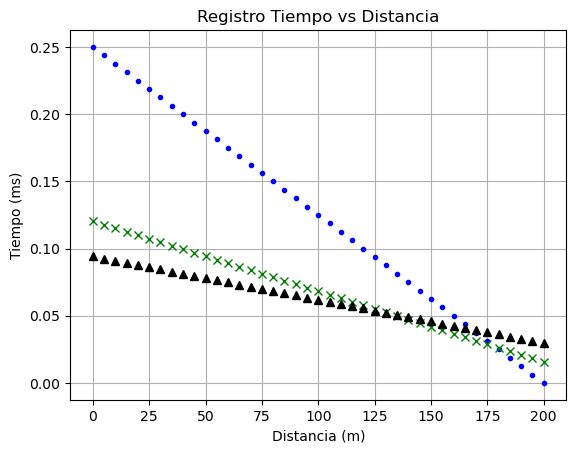

In [217]:
t_1 = []
t_2 = []
t_3 = []
dist = []

for i in range(0, 201, 5):
    t1 = i/800
    t_1.append(t1)
    t2 = ((i*np.sin(senic11-np.radians(10.5)))/800)+((2*8*np.cos(ic11))/800)
    t_2.append(t2)
    t3 = ((i*np.sin(senic12-np.radians(10.5)))/800)+((2*8*np.cos(ic12))/800)+((2*11*np.cos(ic22))/1300)
    t_3.append(t3)
    dist.append(i)
#print(t_1)
#print(t_2)
#print(t_3)
dist2 = dist[::-1]
#print(dist)
#print(dist2)

fig3 = plt.figure()
ax = fig3.add_subplot(111)
ax.plot(dist2, t_1, marker='.', linestyle = ' ', color='blue')
ax.plot(dist2, t_2, marker='x', linestyle = ' ', color='green')
ax.plot(dist2, t_3, marker='^', linestyle = ' ', color='black')

ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Tiempo (ms)')

ax.set_title('Registro Tiempo vs Distancia')
#ax.set_xlim((0, 45))
#ax.set_ylim((0, 90))
ax.grid(True)

plt.show()
#print(len(t_3))


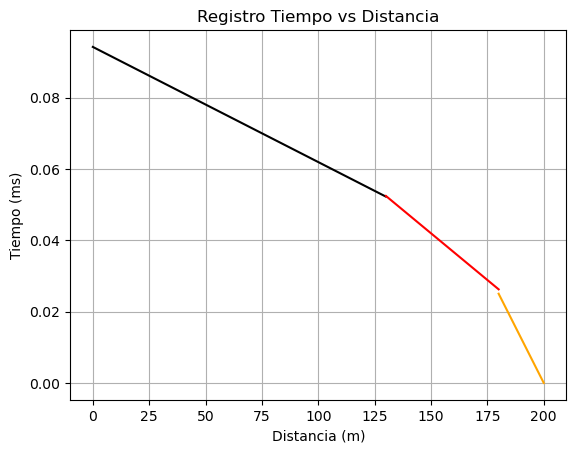

In [221]:
t_11 = []
d_11 = []
for j in range(14, 41):
    t_11.append(t_3[j])
    d_11.append(dist2[j])
#print(t_11)

t_22 = []
d_22 = []
for j in range(4, 15):
    t_22.append(t_2[j])
    d_22.append(dist2[j])
#print(t_22)

t_33 = []
d_33 = []
for j in range(0, 5):
    t_33.append(t_1[j])
    d_33.append(dist2[j])
#print(t_33)

#print(t_11)
#print(d_11)
#print(t_22)
#print(t_33)

fig4 = plt.figure()
ax = fig4.add_subplot(111)
#ax.plot(dist2, t_1, marker='.', linestyle = ' ', color='blue')
#ax.plot(dist2, t_2, marker='x', linestyle = ' ', color='green')
#ax.plot(dist2, t_3, marker='^', linestyle = ' ', color='black')


#Hagamos regresión a la od
odd3 = np.array(d_11) #distancia onda directa
odt3 = np.array(t_11) #tiempo onda directa

mean_odd3 = np.mean(odd3)
mean_odt3 = np.mean(odt3)
n = len(odd3)
numer = np.sum((odd3 - mean_odd3) * (odt3 - mean_odt3))
denom = np.sum((odd3 - mean_odd3) ** 2)
m = (numer / denom)
b = mean_odt3 - (m * mean_odd3)

# Calcular los valores ajustados de y (y_pred)
y_pred4 = m * odd3 + b


# Imprimir la pendiente y la intersección
#print("Pendiente od (m):", m)
#print("Intersección od (b):", b)

plt.plot(odd3, y_pred4, color="black", label="Recta de Regresión Onda Directa")


#Hagamos regresión a la segunda capa
odd4 = np.array(d_22) #distancia onda directa
odt4 = np.array(t_22) #tiempo onda directa

mean_odd4 = np.mean(odd4)
mean_odt4 = np.mean(odt4)
n = len(odd1)
numer = np.sum((odd4 - mean_odd4) * (odt4 - mean_odt4))
denom = np.sum((odd4 - mean_odd4) ** 2)
m = numer / denom
b = mean_odt4 - (m * mean_odd4)

# Calcular los valores ajustados de y (y_pred)
y_pred5 = m * odd4 + b


# Imprimir la pendiente y la intersección
#print("Pendiente od (m):", m)
#print("Intersección od (b):", b)

plt.plot(odd4, y_pred5, color="red", label="Recta de Regresión Onda críticamente refractada - Segundo medio")

#Hagamos regresión a la tercera capa
odd5 = np.array(d_33) #distancia onda directa
odt5 = np.array(t_33) #tiempo onda directa

mean_odd5 = np.mean(odd5)
mean_odt5 = np.mean(odt5)
n = len(odd2)
numer = np.sum((odd5 - mean_odd5) * (odt5 - mean_odt5))
denom = np.sum((odd5 - mean_odd5) ** 2)
m = numer / denom
b = mean_odt5 - (m * mean_odd5)

# Calcular los valores ajustados de y (y_pred)
y_pred6 = m * odd5 + b


# Imprimir la pendiente y la intersección
#print("Pendiente od (m):", m)
#print("Intersección od (b):", b)

plt.plot(odd5, y_pred6, color="orange", label="Recta de Regresión Onda críticamente refractada - Tercer medio")

ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Tiempo (ms)')

ax.set_title('Registro Tiempo vs Distancia')
#ax.set_xlim((0, 45))
#ax.set_ylim((0, 90))
ax.grid(True)
plt.show()


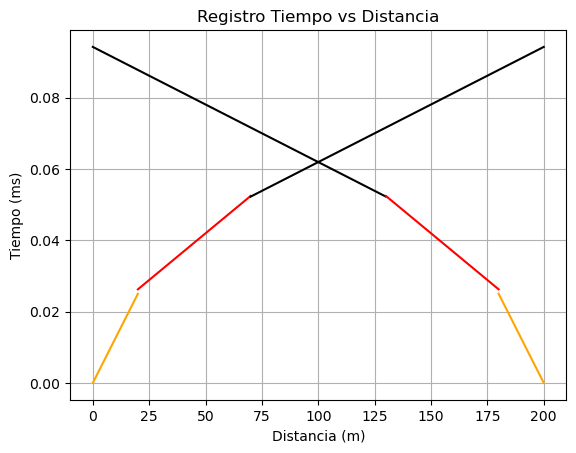

In [222]:
fig3 = plt.figure()
ax = fig3.add_subplot(111)
ax.plot(odd, y_pred1, color="orange", label="Recta de Regresión Onda Directa")
ax.plot(odd1, y_pred2, color="red", label="Recta de Regresión Onda críticamente refractada - Segundo medio")
ax.plot(odd2, y_pred3, color="black", label="Recta de Regresión Onda críticamente refractada - Tercer medio")
ax.plot(odd3, y_pred4, color="black", label="Recta de Regresión Onda Directa")
ax.plot(odd4, y_pred5, color="red", label="Recta de Regresión Onda críticamente refractada - Segundo medio")
ax.plot(odd5, y_pred6, color="orange", label="Recta de Regresión Onda críticamente refractada - Tercer medio")

ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Tiempo (ms)')

ax.set_title('Registro Tiempo vs Distancia')
#ax.set_xlim((0, 45))
#ax.set_ylim((0, 90))
ax.grid(True)

plt.show()

Realizada la regresión en ambas direcciones, se puede concluir que hay una capa oculta. Se podria decir que es un caso de capa delgada, donde el intervalo de refracción es muy corto como para que la segunda refracción llegue primero, esto se debe a que probablemente  la capa tiene un espesor menor y dada su delgadez, es posible que la velocidad de esta capa no contrasta significativamente con las demás, si pensaramos en que tipo de material podria estar contenido en esta capa podria ser material meteorizado que podria actuar como una zona de transción gradacional

**4.** Los siguientes datos fueron tomados a lo largo de una transecta que atraviesa un contacto vertical.
Interprete la forma de la curva de tiempo de viaje y explique lo que significa. Luego determine, hasta
donde sea posible, las velocidades, espesores de capas, y la localización del contacto vertical.

*Al igual que en los otros ejercicios se emplearon fórmulas de pendiente, velocidad, tiempo, interceptos que permiten encontrar el espesor.

Comencemos insertando los datos para poder graficarlos:

In [186]:
#Distancia desde el sitio de disparo (m)
d1 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

#Distancia al contrario para fines de ploteado
d2 = [120, 110, 100, 90, 80, 70, 60, 50, 40, 30, 20, 10]

#Tiempo en una dirección (ms)
t1 = [12.5, 25, 37.5, 50, 64.2, 69.2, 74.2, 79.2, 84.2, 89.2, 94.2, 99.2]

#Tiempo en la dirección contraria (ms)
t2 = [12.5, 25, 37.5, 50, 62.5, 75, 80.8, 85.8, 90.8, 96.7, 99.2, 101.7]

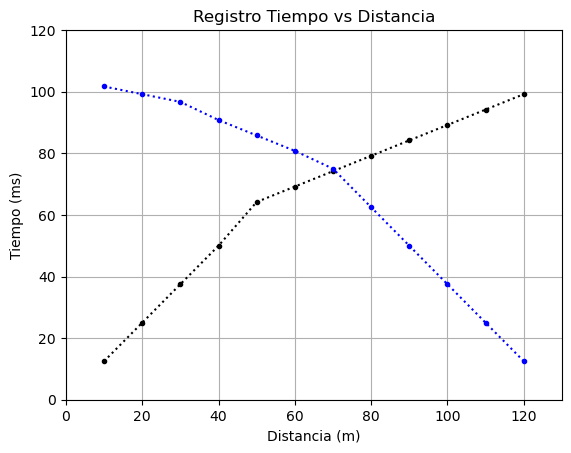

In [187]:
fig3 = plt.figure()
ax = fig3.add_subplot(111)
ax.plot(d1, t1, marker='.', linestyle = ':', color = 'black')
ax.plot(d2, t2, marker='.', linestyle = ':', color = 'blue')

ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Tiempo (ms)')

ax.set_title('Registro Tiempo vs Distancia')
ax.set_xlim((0, 130))
ax.set_ylim((0, 120))
ax.grid(True)

plt.show()

Se puede observar en la gráfica una configuración de frontera inclinada, orientada hacia la derecha, por esta razón las rectas son asimétricas y además reciproca mostrando que la onda críticamente refractada que va de izquierda a derecha llega primero. 
No se observan aumentos en la pendiente, por lo tanto, no estamos hablando de la existencia de un contraste lateral.

Determinemos entonces las velocidades y los espesores de las capas. Para esto realicemos la regresión lineal de los datos. Se usará el caso Down-Dip.

In [188]:
od_d1 = [10, 20, 30, 40, 50] #Distancias correspondientes a la onda directa Down-Dip
od_t1 = [12.5, 25, 37.5, 50, 64.2] #Tiempos correspondientes a la onda directa Down-Dip
oc_d1 = [50, 60, 70, 80, 90, 100, 110, 120] #Distancias correspondientes a la onda críticamente refractada Down-Dip
oc_t1 = [64.2, 69.2, 74.2, 79.2, 84.2, 89.2, 94.2, 99.2] #Tiempos correspondientes a la onda críticamente refractada Down-Dip

od_d2 = [120, 110, 100, 90, 80, 70] #Distancias correspondientes a la onda directa Down-Dip
od_t2 = [12.5, 25, 37.5, 50, 62.5, 75] #Tiempos correspondientes a la onda directa Down-Dip
oc_d2 = [10, 20, 30, 40, 50, 60, 70] #Distancias correspondientes a la onda críticamente refractada Up-Dip
oc_t2 = [101.7, 99.2, 96.7, 90.8, 85.8, 80.8, 75] #Tiempos correspondientes a la onda críticamente refractada Up-Dip

aux = [70, 60, 50, 40, 30, 20, 10]

#[75, 80.8, 85.8, 90.8, 96.7, 99.2, 101.7]

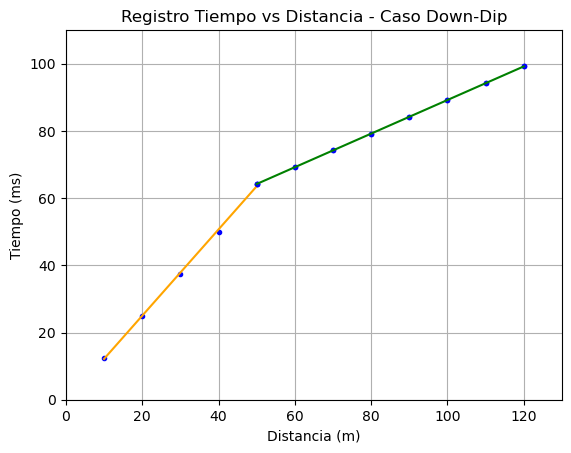

In [189]:
fig4 = plt.figure()
ax = fig4.add_subplot(111)

ax.plot(od_d1, od_t1, marker='.', linestyle = ' ', color='blue')
ax.plot(oc_d1, oc_t1, marker='.', linestyle = ' ', color='blue')
#ax.plot(od_d2, od_t2, marker='.', linestyle = ' ', color='black')
#ax.plot(oc_d2, oc_t2, marker='.', linestyle = ' ', color='black')

#Hagamos regresión a la od
od_d1 = np.array([10, 20, 30, 40, 50]) #distancia onda directa
od_t1 = np.array([12.5, 25, 37.5, 50, 64.2]) #tiempo onda directa

mean_od_d1 = np.mean(od_d1)
mean_od_t1 = np.mean(od_t1)
n4 = len(od_d1)
numer4 = np.sum((od_d1 - mean_od_d1) * (od_t1 - mean_od_t1))
denom4 = np.sum((od_d1 - mean_od_d1) ** 2)
m4 = numer4 / denom4
b4 = mean_od_t1 - (m4 * mean_od_d1)

# Calcular los valores ajustados de y (y_pred)
y_pred = m4 * od_d1 + b4

plt.plot(od_d1, y_pred, color="orange", label="Recta de Regresión")

#Ahora regresión a la críticamente refractada Down-Dip

ax.plot(oc_d1, oc_t1, marker='.', linestyle = ' ', color='blue')

oc_d1 = np.array([50, 60, 70, 80, 90, 100, 110, 120]) #distancia onda criticamente refractada
oc_t1 = np.array([64.2, 69.2, 74.2, 79.2, 84.2, 89.2, 94.2, 99.2]) #tiempo onda criticamente refractada

mean_oc_d1 = np.mean(oc_d1)
mean_oc_t1 = np.mean(oc_t1)
n4 = len(oc_d1)
numer5 = np.sum((oc_d1 - mean_oc_d1) * (oc_t1 - mean_oc_t1))
denom5 = np.sum((oc_d1 - mean_oc_d1) ** 2)
m5 = numer5 / denom5
b5 = mean_oc_t1 - (m5 * mean_oc_d1)

# Calcular los valores ajustados de y (y_pred)
y_pred = m5 * oc_d1 + b5

plt.plot(oc_d1, y_pred, color="green", label="Recta de Regresión")

ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Tiempo (ms)')
#ax2.set_ylabel('Tiempo (ms)')

ax.set_title('Registro Tiempo vs Distancia - Caso Down-Dip')
ax.set_xlim((0, 130))
ax.set_ylim((0, 110))
ax.grid(True)

plt.show()

Las pendientes e interceptos se presentan a continuación:

In [190]:
#Imprimir la pendiente y la intersección Onda directa
print("Pendiente Onda directa (m):", m4)
print("Intersepto Onda directa (ms):", round(b4, 3))
print()
#Imprimir la pendiente y la intersección
print("Pendiente Onda críticamente refractada (ms/m):", m5)
print("Intersepto Onda críticamente refractada (ms):", round(b5, 3))

Pendiente Onda directa (m): 1.284
Intersepto Onda directa (ms): -0.68

Pendiente Onda críticamente refractada (ms/m): 0.5
Intersepto Onda críticamente refractada (ms): 39.2


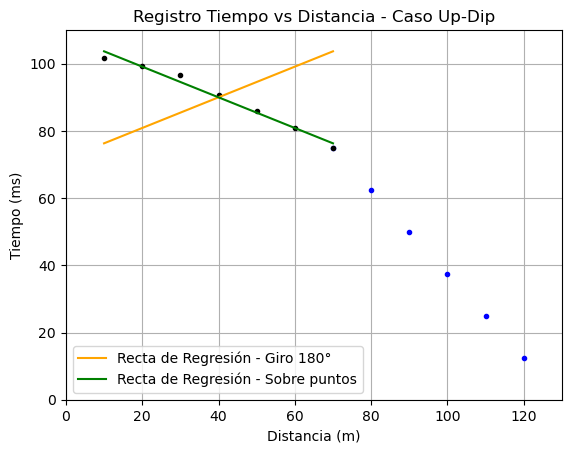

In [191]:
fig5 = plt.figure()
ax = fig5.add_subplot(111)

ax.plot(od_d2, od_t2, marker='.', linestyle = ' ', color='blue')
ax.plot(oc_d2, oc_t2, marker='.', linestyle = ' ', color='black')


#Hagamos regresión a la oc
oc_d2 = np.array([10, 20, 30, 40, 50, 60, 70]) #distancia onda critica
oc_t2 = np.array([101.7, 99.2, 96.7, 90.8, 85.8, 80.8, 75]) #tiempo onda critica

mean_oc_d2 = np.mean(oc_d2)
mean_oc_t2 = np.mean(oc_t2)
n5 = len(od_d1)
numer6 = np.sum((oc_d2 - mean_oc_d2) * (oc_t2 - mean_oc_t2))
denom6 = np.sum((oc_d2 - mean_oc_d2) ** 2)
m6 = (-1*(numer6 / denom6))
b6 = mean_oc_t2 - (m6 * mean_oc_d2)

# Calcular los valores ajustados de y (y_pred)
y_pred = m6 * oc_d2 + b6

plt.plot(oc_d2, y_pred, color="orange", label="Recta de Regresión - Giro 180°")
plt.plot(aux, y_pred, color="green", label="Recta de Regresión - Sobre puntos")


ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Tiempo (ms)')
#ax2.set_ylabel('Tiempo (ms)')

ax.set_title('Registro Tiempo vs Distancia - Caso Up-Dip')
ax.set_xlim((0, 130))
ax.set_ylim((0, 110))
ax.legend()
ax.grid(True)

plt.show()

Graficamos la recta con una reflexión respecto al un eje central para que el programa pudiera calcular el intercepto con el eje adecuado.

La pendiente e intersección podemos verla a continuación:

In [192]:
print("Pendiente Onda críticamente refractada (ms/m):", round(m6, 3))
print("Intersección Onda críticamente refractada (ms):", b6)

Pendiente Onda críticamente refractada (ms/m): 0.456
Intersección Onda críticamente refractada (ms): 71.74285714285713


Ahora determinemos las velocidades y los espesores a partir de estos datos:

In [193]:
#Velocidad Onda Directa:
velocidad4 = round((1/m4), 3)

print("La velocidad por encima de la frontera es", velocidad4, "m/ms")
print()

La velocidad por encima de la frontera es 0.779 m/ms



In [194]:
#Angulo de buzamiento de la capa
angbuz2 = 0.5*(np.arcsin(velocidad4*m5)-np.arcsin(velocidad4*m6))

#Angulo de incidencia crítico
angcrit3 = np.arcsin(v1*m5)-angbuz2

#Velocidad bajo frontera
v2 = velocidad4/(np.sin(angcrit3 + angbuz2))

print("El ángulo de buzamiento de la capa es", round(np.degrees(angbuz), 3), "°", sep= ' ')
print("El ángulo de incidencia crítico", round(np.degrees(angcrit3), 3), "°", sep= ' ')
print()
print("La velocidad bajo la frontera es ", round(np.degrees(angbuz), 3), "m/ms")

El ángulo de buzamiento de la capa es 6.215 °
El ángulo de incidencia crítico 47.543 °

La velocidad bajo la frontera es  6.215 m/ms


In [195]:
#Espesor a la izquierda
h1 = (b5*v1)/(2*np.cos(angcrit3))
print("El espesor de la capa en el costado izquierdo es", round(h1, 3), "m")
h2 = (b6*v1)/(2*np.cos(angcrit3))
print("El espesor de la capa en el costado derecho es", round(h2, 3), "m")

El espesor de la capa en el costado izquierdo es 43.553 m
El espesor de la capa en el costado derecho es 79.709 m
